In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import scipy.stats as stat
from model_fit_functions import *
import statsmodels.stats.proportion as proportion

In [2]:
def model_comp_pvals(N, frequencies):
    pNull=sum(frequencies)/(4*N)
    pFull=frequencies/N

    LikelyNull = np.prod(stat.binom.pmf(frequencies,N,pNull))
    LikelyFull = np.prod(stat.binom.pmf(frequencies,N,pFull))

    chi_sq = -2 * np.log(LikelyNull/LikelyFull)
#     print(chi_sq)
    return chi_sq, 1-stat.chi2.cdf(chi_sq, 3, )   #% goodness of fit for Full vs Null (whehter there are differences between conditions)

#     pEffect=[.75 .75 .75 .25];  #% power to detect three dual state and one single state (87% power with N=15)


In [4]:
single_fits = pd.read_csv('model_results/single_fit_avgerror_results.csv').drop('Unnamed: 0', axis = 1).reset_index().drop('index', axis = 1)
dual_fits = pd.read_csv('model_results/dual_fit_avgerror_results.csv').drop('Unnamed: 0', axis = 1).reset_index().drop('index', axis = 1)

Text(0.5, 1.0, 'Dual State')

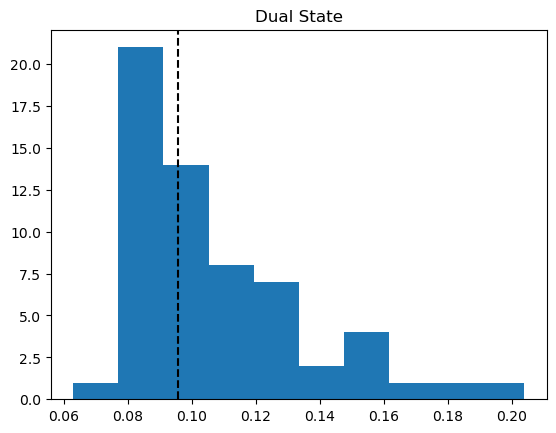

In [6]:
eps_measure = single_fits['Eps']
plt.hist(eps_measure)
plt.axvline(x = np.median(eps_measure), ls = '--', color = 'black')
plt.title('Dual State')

In [8]:
single_fits['AIC'] = 2*single_fits['gof'] + 2*2
dual_fits['AIC'] = 2*dual_fits['gof'] + 2*4

single_fits['BIC'] = 2*single_fits['gof']*640 + np.log(64*7)*2
dual_fits['BIC'] = 2*dual_fits['gof']*640 + np.log(64*7)*4


In [9]:
single_fits.loc[single_fits['p_id']%2 == 0, 'Emphasis'] = 'Speed'
single_fits.loc[single_fits['p_id']%2 == 1, 'Emphasis'] = 'Accuracy'

single_fits.loc[single_fits['p_id']%4 == 0, 'Rotation'] = 'Sudden'
single_fits.loc[single_fits['p_id']%4 == 1, 'Rotation'] = 'Sudden'
single_fits.loc[single_fits['p_id']%4 == 2, 'Rotation'] = 'Gradual'
single_fits.loc[single_fits['p_id']%4 == 3, 'Rotation'] = 'Gradual'


dual_fits.loc[dual_fits['p_id']%2 == 0, 'Emphasis'] = 'Speed'
dual_fits.loc[dual_fits['p_id']%2 == 1, 'Emphasis'] = 'Accuracy'

dual_fits.loc[dual_fits['p_id']%4 == 0, 'Rotation'] = 'Sudden'
dual_fits.loc[dual_fits['p_id']%4 == 1, 'Rotation'] = 'Sudden'
dual_fits.loc[dual_fits['p_id']%4 == 2, 'Rotation'] = 'Gradual'
dual_fits.loc[dual_fits['p_id']%4 == 3, 'Rotation'] = 'Gradual'


single_fits['Condition'] = single_fits['Rotation'] + ' ' + single_fits['Emphasis']

In [10]:
single_fits['Condition'].value_counts()

Sudden Speed        15
Sudden Accuracy     15
Gradual Speed       15
Gradual Accuracy    15
Name: Condition, dtype: int64

In [11]:
single_fits.loc[single_fits['AIC'] > dual_fits['AIC'], 'Condition'].value_counts()

Gradual Accuracy    15
Sudden Accuracy     13
Gradual Speed       12
Sudden Speed         9
Name: Condition, dtype: int64

In [28]:
model_comp_pvals(15, np.array([4, 4, 1, 0]))

(8.582279447793796, 0.03539252009691629)

In [12]:
single_fits.loc[single_fits['BIC'] > dual_fits['BIC'], 'Condition'].value_counts()

Sudden Accuracy     15
Gradual Accuracy    15
Gradual Speed       14
Sudden Speed        13
Name: Condition, dtype: int64

In [30]:
model_comp_pvals(15, np.array([4, 3, 0, 0]))

(10.818134694664122, 0.012751057144216427)

In [31]:
single_fits['LR_ratio'] = 2* (single_fits['gof'].values - dual_fits['gof'].values)*640

In [32]:
single_fits['chi2'] = stat.chi2.sf(single_fits['LR_ratio'], 2)

In [33]:
single_fits.loc[single_fits['chi2'] < 0.05, 'Condition'].value_counts()

Sudden Accuracy    4
Sudden Speed       4
Gradual Speed      1
Name: Condition, dtype: int64

In [34]:
model_comp_pvals(15, np.array([8, 3, 0, 0]))

(21.429490264686347, 8.572321699684693e-05)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 59.]),
 array([-1.12050745e+99, -1.00845670e+99, -8.96405960e+98, -7.84355215e+98,
        -6.72304470e+98, -5.60253725e+98, -4.48202980e+98, -3.36152235e+98,
        -2.24101490e+98, -1.12050745e+98,  1.34110230e-01]),
 <BarContainer object of 10 artists>)

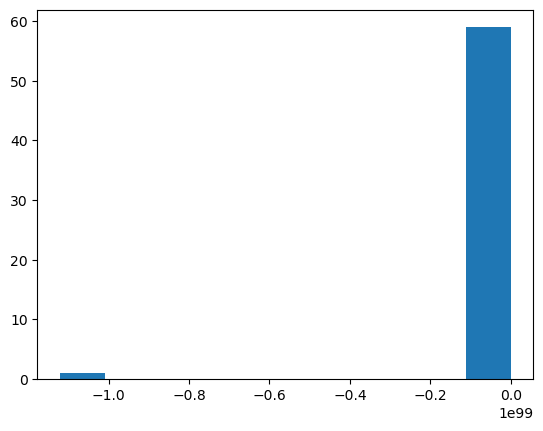

In [35]:
plt.hist(single_fits['gof'].values - dual_fits['gof'].values)

# Cross Validation Comparisons

In [36]:
single_fits = pd.read_csv('model_results/single_fit_avgsignederror_results_cv.csv')
dual_fits = pd.read_csv('model_results/dual_fit_avgsignederror_results_cv.csv')

single_fits.loc[single_fits['p_id']%2 == 0, 'Emphasis'] = 'Speed'
single_fits.loc[single_fits['p_id']%2 == 1, 'Emphasis'] = 'Accuracy'

single_fits.loc[single_fits['p_id']%4 == 0, 'Rotation'] = 'Sudden'
single_fits.loc[single_fits['p_id']%4 == 1, 'Rotation'] = 'Sudden'
single_fits.loc[single_fits['p_id']%4 == 2, 'Rotation'] = 'Gradual'
single_fits.loc[single_fits['p_id']%4 == 3, 'Rotation'] = 'Gradual'


dual_fits.loc[dual_fits['p_id']%2 == 0, 'Emphasis'] = 'Speed'
dual_fits.loc[dual_fits['p_id']%2 == 1, 'Emphasis'] = 'Accuracy'

dual_fits.loc[dual_fits['p_id']%4 == 0, 'Rotation'] = 'Sudden'
dual_fits.loc[dual_fits['p_id']%4 == 1, 'Rotation'] = 'Sudden'
dual_fits.loc[dual_fits['p_id']%4 == 2, 'Rotation'] = 'Gradual'
dual_fits.loc[dual_fits['p_id']%4 == 3, 'Rotation'] = 'Gradual'


single_fits['Condition'] = single_fits['Rotation'] + ' ' + single_fits['Emphasis']

In [37]:
from scipy import stats
single_fits = single_fits[(np.abs(stats.zscore(dual_fits['gof'])) < 3)]
dual_fits = dual_fits[(np.abs(stats.zscore(dual_fits['gof'])) < 3)]



In [38]:
dual_fits['dual win'] = (single_fits['test gof'].values > dual_fits['test gof'].values).astype(int)

In [39]:
def compute_wins(dual_fits):
    # Drop column: 'Unnamed: 0'
    # dual_fits = dual_fits.drop(columns=['Unnamed: 0'])
    # Performed 1 aggregation grouped on columns: 'p_id', 'Rotation' and 2 other columns
    dual_fits = dual_fits.groupby(['p_id', 'Rotation', 'Emphasis', 'dual win']).agg(dualwin_count=('dual win', 'count')).reset_index()
    # Filter rows based on column: 'dual win'
    dual_fits = dual_fits[dual_fits['dual win'] == 1]
    return dual_fits

dual_fits_wins = compute_wins(dual_fits.copy())
dual_fits_wins['Condition'] = dual_fits_wins['Rotation'] + ' ' + dual_fits_wins['Emphasis']

In [42]:
dual_fits_wins.loc[dual_fits_wins['dualwin_count'] > 57, 'Condition'].value_counts()

Sudden Accuracy     6
Sudden Speed        5
Gradual Accuracy    3
Gradual Speed       2
Name: Condition, dtype: int64

In [45]:
model_comp_pvals(15, np.array([6, 5, 3, 2]))

(3.511738788077822, 0.3192428277749366)

(array([4.895e+03, 1.190e+02, 9.400e+01, 8.400e+01, 8.000e+00, 7.200e+01,
        1.330e+02, 8.500e+01, 8.000e+00, 2.000e+00]),
 array([-0.00061067,  0.01790749,  0.03642564,  0.05494379,  0.07346195,
         0.0919801 ,  0.11049826,  0.12901641,  0.14753456,  0.16605272,
         0.18457087]),
 <BarContainer object of 10 artists>)

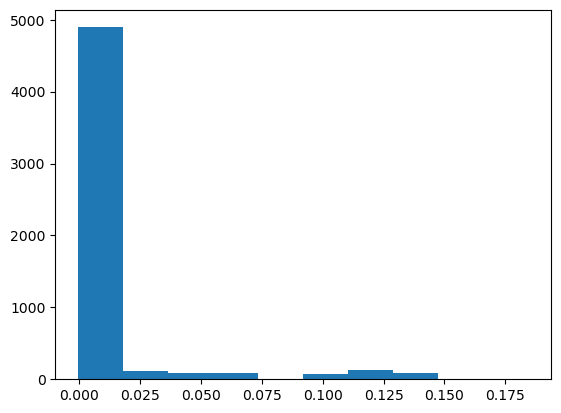

In [44]:
plt.hist(single_fits['gof'].values - dual_fits['gof'].values)

# Testing model fits

In [20]:
df = pd.read_csv('df_allphases_initerror.csv')

['Sudden']
['Accuracy']


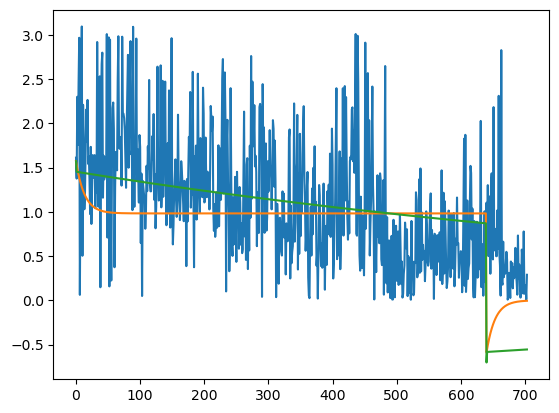

In [27]:
pid = 13
p_type = 'Sudden'
plt.plot(df.loc[df['p_id'] == pid, 'init errors'].values[64:])
plt.plot(single_state_model(single_fits.iloc[pid]['A'], single_fits.iloc[pid]['B'], 704, p_type))
plt.plot(dual_state_model(dual_fits.iloc[pid]['As'], dual_fits.iloc[pid]['Bs'], dual_fits.iloc[pid]['Bf'], dual_fits.iloc[pid]['Bf'], 704, p_type))
print(df.loc[df['p_id'] == pid, 'Rotation'].unique())
print(df.loc[df['p_id'] == pid, 'Emphasis'].unique())



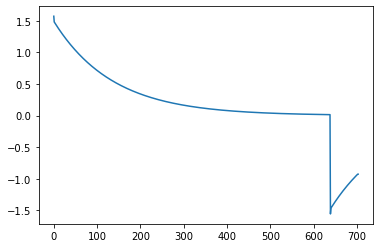

In [393]:
plt.plot(dual_state_model(dual_fits.iloc[pid]['As'], dual_fits.iloc[pid]['Bs'], dual_fits.iloc[pid]['Bf'], dual_fits.iloc[pid]['Bf'], 704, 'Sudden'))


In [394]:
single_fits.iloc[pid], dual_fits.iloc[pid]

(p_id                    26
 gof             312.293221
 A                 0.994508
 B                 0.033931
 Eps               0.394173
 AIC             628.586442
 BIC             636.796028
 Emphasis             Speed
 Rotation           Gradual
 Condition    Gradual Speed
 Name: 26, dtype: object,
 p_id                26
 gof         311.390472
 As                 1.0
 Bs            0.007744
 Af            0.976238
 Bf            0.049944
 Eps           0.393616
 AIC         630.780943
 BIC         647.200116
 Emphasis         Speed
 Rotation       Gradual
 Name: 26, dtype: object)

In [440]:
df[df['p_id'] == 3]

,p_id,Trial,Block,Rotation,Emphasis,init signed error,init signed error degrees,signed avg errors,signed avg errors degrees,avg errors,avg errors degrees
1920,3,64,1,Gradual,Accuracy,-0.002641,-0.151326,0.075220,4.309810,0.075220,4.309810
1921,3,65,1,Gradual,Accuracy,-0.188205,-10.783344,0.207854,11.909178,0.207854,11.909178
1922,3,66,1,Gradual,Accuracy,-0.019172,-1.098468,0.071582,4.101370,0.071582,4.101370
1923,3,67,1,Gradual,Accuracy,-0.071103,-4.073880,0.073981,4.238798,0.073981,4.238798
1924,3,68,1,Gradual,Accuracy,0.003519,0.201621,0.043447,2.489347,0.043447,2.489347
...,...,...,...,...,...,...,...,...,...,...,...
2555,3,699,10,Gradual,Accuracy,-0.117252,-6.718042,0.214726,12.302881,0.214726,12.302881
2556,3,700,10,Gradual,Accuracy,-0.059318,-3.398658,0.308339,17.666545,0.308339,17.666545
2557,3,701,10,Gradual,Accuracy,-0.127496,-7.304993,0.192571,11.033497,0.192571,11.033497
2558,3,702,10,Gradual,Accuracy,0.031461,1.802606,0.063658,3.647359,0.063658,3.647359
